In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Applied DS (1)/Labsheet8/train (1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print('Columns List',df.columns)
print("Rows and Columns count",df.shape)

Columns List Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Rows and Columns count (2000, 21)


In [5]:
#price range correlation
corr=df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [6]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:
y = df["price_range"].values
x=df.drop(["price_range"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=45)

In [8]:
!pip install yellowbrick

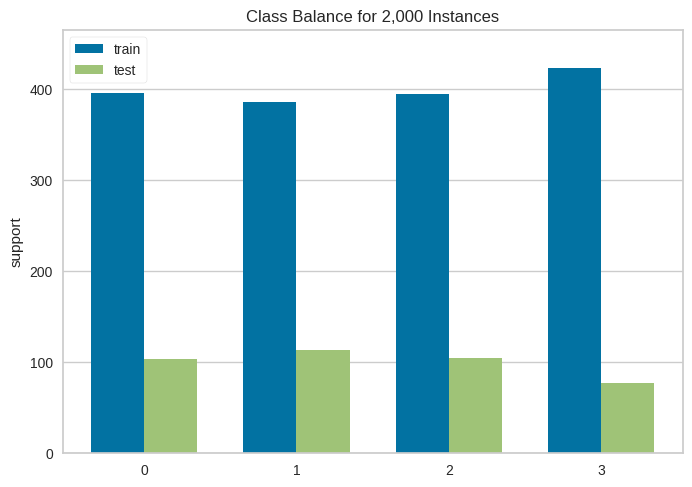

<Axes: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [9]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [10]:
#First Model
from sklearn.svm import SVC
svm1=SVC(random_state=45)
svm1.fit(x_train,y_train)
y_pred=svm1.predict(x_test)
print("train accuracy:",svm1.score(x_train,y_train))
print("test accuracy:",svm1.score(x_test,y_test))
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test, y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(acc1))

train accuracy: 0.951875
test accuracy: 0.96
Model accuracy score with default hyperparameters: 0.9600


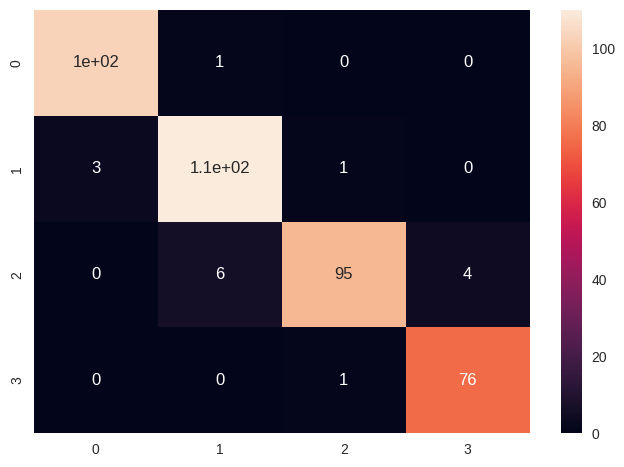

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

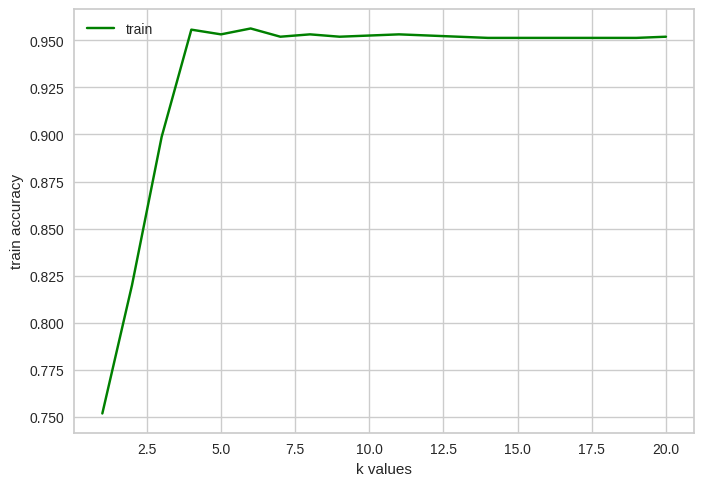

In [12]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm1.fit(x_new,y_train)
    accuracy_list_train.append(svm1.score(x_new,y_train))

plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [13]:
#In the graph above, we can see 4 or 5 features gives higher train accuracies.
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.95625
max accuracy id: 5


In [14]:
print(" max accuracy values: \n", df.iloc[5])

 max accuracy values: 
 best features number    6.00000
train_score             0.95625
Name: 5, dtype: float64


In [15]:
#Use 6 features because it has the highest accuracy.
selector = SelectKBest(f_classif, k = 6)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'px_height' 'px_width' 'ram' 'talk_time' 'touch_screen']
x test features: ['battery_power' 'px_height' 'px_width' 'ram' 'talk_time' 'touch_screen']


In [16]:
# instantiate classifier with default hyperparameters
from sklearn.metrics import accuracy_score
svc=SVC()
# fit classifier to training set
svc.fit(x_new,y_train)
# make predictions on test set
y_pred=svc.predict(x_new_test)
# compute and print accuracy score
acc2=accuracy_score(y_test, y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(acc2))

Model accuracy score with default hyperparameters: 0.2600


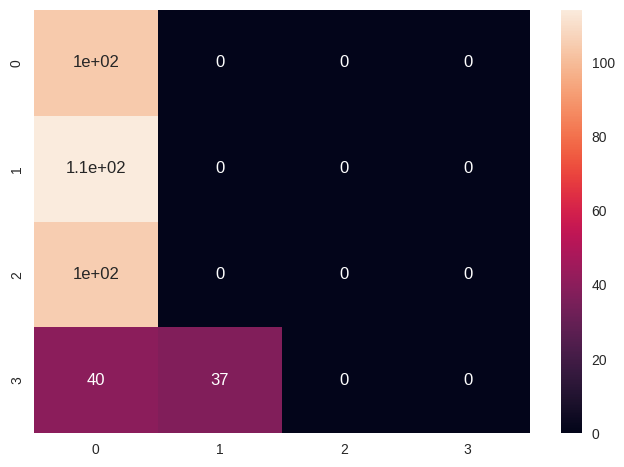

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [18]:
# instantiate classifier with default hyperparameters
from sklearn.metrics import accuracy_score
rbfsvm=SVC(kernel="rbf",C=2)
# fit classifier to training set
rbfsvm.fit(x_train,y_train)
# make predictions on test set
y_pred=rbfsvm.predict(x_test)
# compute and print accuracy score
acc3=accuracy_score(y_test, y_pred)
print('Model accuracy score with C=100 and kernel =rbf hyperparameters: {0:0.4f}'. format(acc3))

Model accuracy score with C=100 and kernel =rbf hyperparameters: 0.9600


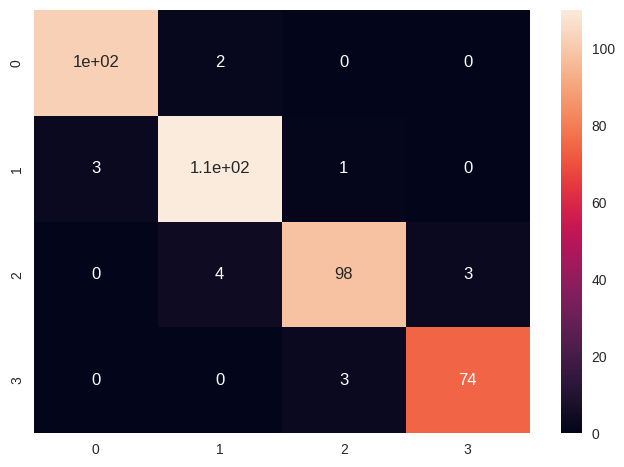

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [20]:
# instantiate classifier with default hyperparameters
from sklearn.metrics import accuracy_score
polysvc=SVC(kernel="poly",C=100)
# fit classifier to training set
polysvc.fit(x_train,y_train)
# make predictions on test set
y_pred=polysvc.predict(x_test)
# compute and print accuracy score
acc4=accuracy_score(y_test, y_pred)
print('Model accuracy score with kernel="poly",C=100 hyperparameters: {0:0.4f}'. format(acc4))

Model accuracy score with kernel="poly",C=100 hyperparameters: 0.9650


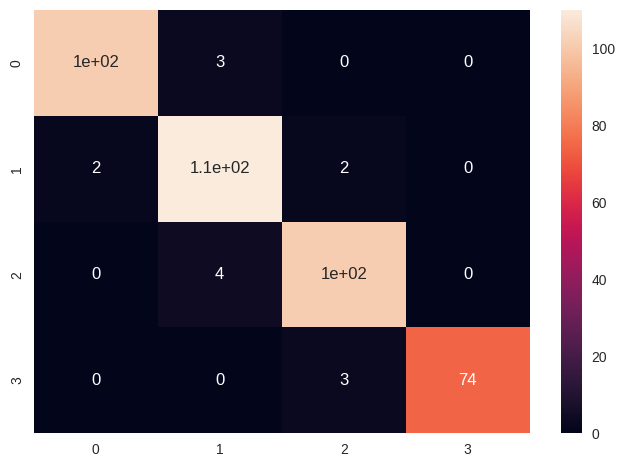

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [22]:
!pip install texttable

In [23]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Model', 'Accuracy'], ['SVM',acc1],['SVM(selected features)',acc2],['RBF SVM',acc3],
           ['SVM',acc4]])
print(t.draw())

+------------------------+----------+
|         Model          | Accuracy |
+========================+==========+
| SVM                    | 0.960    |
+------------------------+----------+
| SVM(selected features) | 0.260    |
+------------------------+----------+
| RBF SVM                | 0.960    |
+------------------------+----------+
| SVM                    | 0.965    |
+------------------------+----------+
